In [50]:
# %pip install pandas

In [51]:
import psycopg2 as ps
import pandas as pd

In [52]:
conn = ps.connect(dbname='postgres', user='student', 
                        password='student', host='104.197.87.141')


In [53]:
df = pd.read_sql_query("SELECT surname, name, absences, unready_labs FROM faculty_ua.students", con=conn)
df

C:\Users\user\AppData\Local\Temp\ipykernel_16020\2039172146.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT surname, name, absences, unready_labs FROM faculty_ua.students", con=conn)


,surname,name,absences,unready_labs
0,Антоненко,Ганна,82,4
1,Вербицький,Дмитро,112,6
2,Глушковський,Антон,12,3
3,Єлісєєва,Марина,10,2
4,Закопайло,Олексій,90,4
...,...,...,...,...
879,Мацнєва,Вікторія,8,0
880,Соколовський,Максим,4,0
881,Рожнова,Ксенія,0,0
882,Сушко,Олександр,0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   surname       884 non-null    object
 1   name          877 non-null    object
 2   absences      884 non-null    int64 
 3   unready_labs  884 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 27.8+ KB


In [55]:
df.describe()

,absences,unready_labs
count,884.000000,884.000000
mean,27.391403,3.531674
std,37.142323,4.007370
min,0.000000,0.000000
25%,2.000000,0.000000
50%,12.000000,2.000000
75%,40.000000,5.000000
max,216.000000,27.000000


In [56]:
df.iloc[3,1]

'Марина'

In [57]:
df1 = df[df['absences']>110]
df1

,surname,name,absences,unready_labs
1,Вербицький,Дмитро,112,6
41,Брагін,Євген,112,11
44,Гавриленков,Олександр,115,10
55,Павлів,Ігор,124,15
56,Сорокін,Юрій,117,13
66,Семененко,Світлана,116,17
68,Балан,Олег,150,7
73,Голуб,Данило,154,7
85,Спесивцев,Сергій,164,7
101,Піляєв,Артем,172,7


In [58]:
df1 = df[df['absences']>110]

df1.style.highlight_max(subset = ['absences'], color='red', axis = 0) \
    .highlight_min(subset = ['absences'], color='green', axis = 0) \
    .highlight_max(subset = ['unready_labs'], color='magenta', axis = 0) \
    .highlight_min(subset = ['unready_labs'], color='lightgreen', axis = 0)

,surname,name,absences,unready_labs
1,Вербицький,Дмитро,112,6
41,Брагін,Євген,112,11
44,Гавриленков,Олександр,115,10
55,Павлів,Ігор,124,15
56,Сорокін,Юрій,117,13
66,Семененко,Світлана,116,17
68,Балан,Олег,150,7
73,Голуб,Данило,154,7
85,Спесивцев,Сергій,164,7
101,Піляєв,Артем,172,7


In [59]:
df1.sort_values('absences', ascending=False).style.bar(subset=['absences'], color='darkred')#, vmin=110)

,surname,name,absences,unready_labs
150,Сліченко,Михайло,216,11
221,Степанчук,Олена,198,19
240,Щербаков,Дмитро,194,12
225,Токаренко,Олексій,182,19
147,Купрійов,Сергій,182,12
849,Баттулга,Вепа,180,10
132,Мандахнар,Космас,180,10
101,Піляєв,Артем,172,7
648,Гармашов,Артем,170,0
85,Спесивцев,Сергій,164,7


In [60]:
dfg = pd.read_sql_query(
    "SELECT g.group_number, COUNT(s.student_id) students, SUM(s.absences) absences, sum(unready_labs) unready_labs "
    + "FROM faculty_ua.students s JOIN faculty_ua.groups g "
    + "ON s.group_id = g.group_id "
    + "GROUP BY g.group_number "
    , con=conn)
dfg

C:\Users\user\AppData\Local\Temp\ipykernel_16020\3088656014.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfg = pd.read_sql_query(


,group_number,students,absences,unready_labs
0,333,21,623,0
1,332,23,718,111
2,354,7,854,35
3,341,18,1432,84
4,356,23,1735,220
...,...,...,...,...
61,321,15,91,48
62,339,18,356,108
63,317ст,25,219,60
64,319,23,143,46


<AxesSubplot: xlabel='students'>

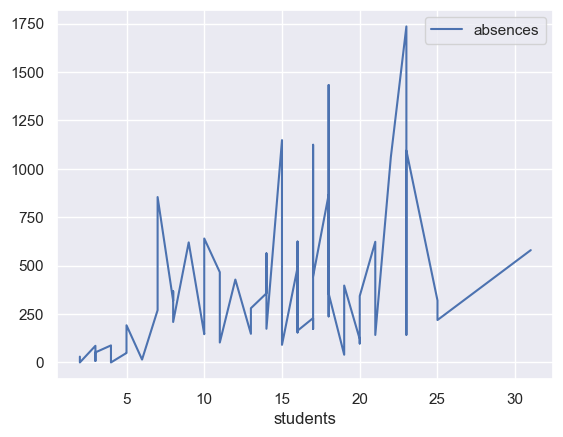

In [61]:
dfg.sort_values('students').plot(x = 'students', y = 'absences')

<AxesSubplot: xlabel='students', ylabel='absences'>

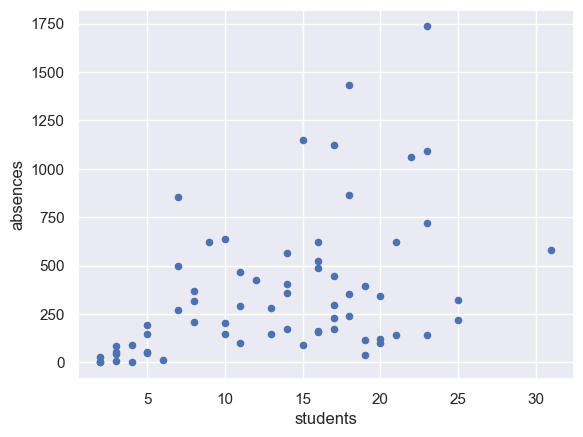

In [62]:
dfg.plot.scatter(x = 'students', y = 'absences')

In [63]:
 # %pip install matplotlib

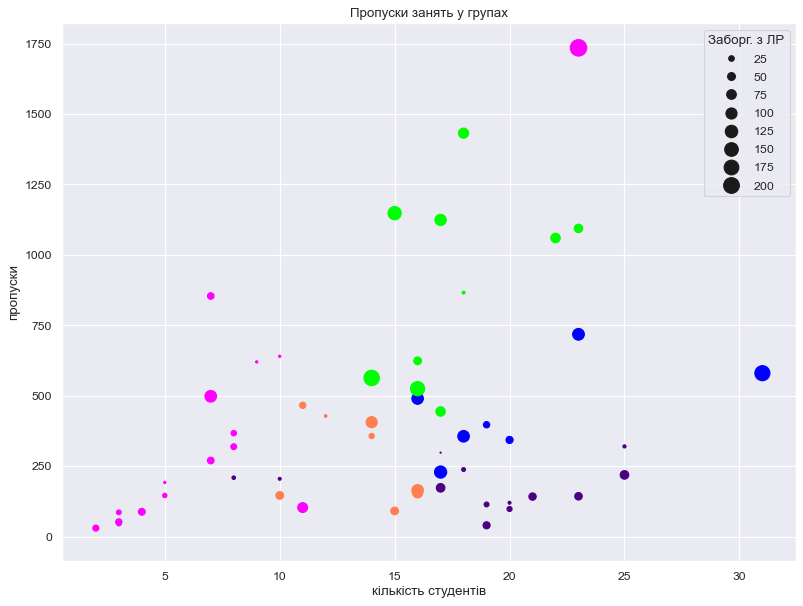

In [64]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 12), dpi= 80)
# fig, ax = plt.subplots()

grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
ax = fig.add_subplot(grid[:-1, :-1])

x = list(dfg['students'])
y = list(dfg['absences'])
sizes = list(dfg['unready_labs'])

cources = [str[1] for str in list(dfg['group_number'])]
colors = {1:'indigo', 2:'coral', 3:'blue', 4:'lime', 5:'magenta'}
cololor_list =  [colors[int(cr)] for cr in cources]

# i=0;
# while i < len(cololor_list):
#     print(list(dfg['group_number'])[i], cources[i],  cololor_list[i])
#     i+=1

scatter = ax.scatter(x, y, c=cololor_list, s=sizes, label=colors)
ax.set_title("Пропуски занять у групах")
ax.legend()
handles, labels = scatter.legend_elements(prop="sizes")
legend1 = ax.legend(handles, labels, loc="upper right", title="Заборг. з ЛР")
ax.set_xlabel('кількість студентів', fontsize = 12)
ax.set_ylabel('пропуски', fontsize = 12)

# бокові гістограми

# ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
# ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
# ax_bottom.hist(x, len(x), histtype='stepfilled', orientation='vertical', color='mediumvioletred')
# ax_bottom.invert_yaxis()
# ax_right.hist(y, len(y), histtype='stepfilled', orientation='horizontal', color='mediumvioletred')

plt.show()


In [65]:
i=0;
while i < len(cololor_list):
    print(list(dfg['group_number'])[i], cources[i],  cololor_list[i])
    i+=1

333 3 blue
332 3 blue
354 5 magenta
341 4 lime
356 5 magenta
347 4 lime
350м 5 magenta
340 4 lime
336 3 blue
352 5 magenta
359 5 magenta
325 2 coral
317 1 indigo
359м 5 magenta
326 2 coral
358А 5 magenta
323 2 coral
346 4 lime
320 2 coral
355А 5 magenta
315А 1 indigo
313ст 1 indigo
312 1 indigo
335а 3 blue
312A 1 indigo
315 1 indigo
313 1 indigo
353 5 magenta
335 3 blue
355Б 5 magenta
354м 5 magenta
355 5 magenta
342 4 lime
355ам 5 magenta
310 1 indigo
351 5 magenta
328 2 coral
331 3 blue
355м 5 magenta
322 2 coral
353м 5 magenta
358ам 5 magenta
356м 5 magenta
325А 2 coral
338 3 blue
355бм 5 magenta
358 5 magenta
343 4 lime
358м 5 magenta
349 4 lime
351м 5 magenta
311 1 indigo
345а 4 lime
350 5 magenta
329 2 coral
348 4 lime
345 4 lime
316 1 indigo
352м 5 magenta
318 1 indigo
327С 2 coral
321 2 coral
339 3 blue
317ст 1 indigo
319 1 indigo
330 3 blue


In [66]:
dfcc = pd.read_sql_query(
    "SELECT c.chair_number AS chair, SUBSTRING(g.group_number, 2, 1) AS course, "
    + "COUNT(s.student_id) students, SUM(s.absences) absences, sum(unready_labs) unready_labs "
    + "FROM faculty_ua.students s JOIN faculty_ua.groups g ON s.group_id = g.group_id "
	+ "JOIN faculty_ua.chairs c ON c.chair_id = g.chair_id "
    + "GROUP BY c.chair_number, course "
    , con=conn)
dfcc

C:\Users\user\AppData\Local\Temp\ipykernel_16020\3629080859.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfcc = pd.read_sql_query(


,chair,course,students,absences,unready_labs
0,302,4,32,2272,245
1,304,2,24,552,148
2,302,1,64,379,108
3,301,2,43,622,70
4,304,4,30,1088,355
5,302,2,32,319,191
6,305,1,23,143,46
7,301,5,38,1452,79
8,302,5,31,2054,248
9,304,5,20,712,206


<Figure size 1280x800 with 0 Axes>

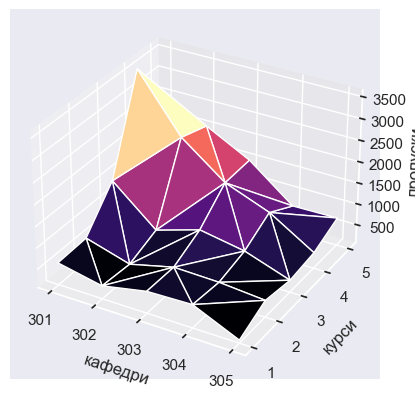

In [67]:
import matplotlib.pyplot as plt


dfs = dfcc.sort_values('chair')

x = list(dfs['chair'])
y = list(dfs['course'])
z = list(dfs['absences'])

plt.figure(figsize=(16,10), dpi= 80)
figg, axx = plt.subplots(subplot_kw={"projection": "3d"})

axx.plot_trisurf(x, y, z,cmap='magma')

axx.set_xlabel('кафедри')
axx.set_ylabel('курси')
axx.set_zlabel('пропуски')

plt.show()

In [68]:
# %pip install seaborn --user

C:\Users\user\AppData\Local\Temp\ipykernel_16020\570004242.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  chart = dfcc.pivot('chair', 'course', 'absences')


<AxesSubplot: xlabel='course', ylabel='chair'>

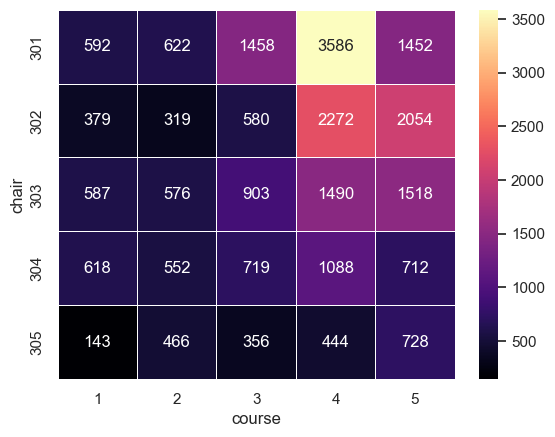

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

chart = dfcc.pivot('chair', 'course', 'absences')

f = plt.subplots()
sns.heatmap(chart, annot=True, linewidths=.5, fmt="d", cmap="magma")

C:\Users\user\AppData\Local\Temp\ipykernel_16020\3641681239.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfsum = dfcc.groupby(by='chair', group_keys=True).sum()


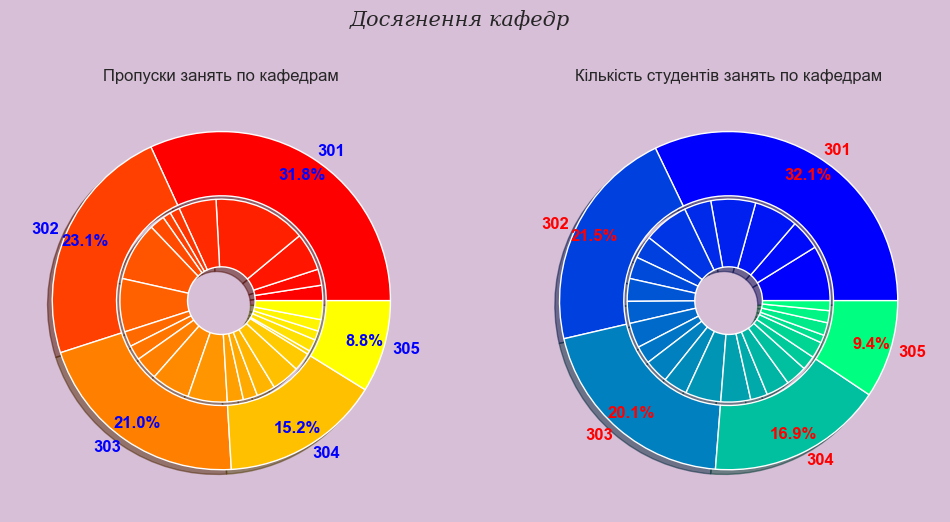

In [70]:
import numpy as np

dfsum = dfcc.groupby(by='chair', group_keys=True).sum()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), subplot_kw=dict(aspect="equal"))
fig.suptitle('Досягнення кафедр', fontfamily = 'serif',
                fontstyle = 'italic',
                fontsize = 15)
fig.set_facecolor('thistle') 

size = 0.4
chairs = list(dfcc.groupby(by='chair', group_keys=True).groups.keys())

# перший пончик

abs_outer = list(dfsum['absences'])
abs_inner = list(dfcc.sort_values(by=['chair', 'course'])['absences'])

clr_outer1 = plt.cm.autumn(np.linspace(0,1,len(abs_outer)))
clr_inner1 = plt.cm.autumn(np.linspace(0,1,len(abs_inner)))

ax[0].pie(abs_outer, startangle=0, pctdistance =0.88, colors=clr_outer1, labels=chairs,
       autopct = '%1.1f%%', labeldistance=1.05, radius= 1.0, wedgeprops=dict(width=0.95*size, edgecolor='w'), shadow=True,
       textprops=dict(color='blue', size=12, weight='bold'))

ax[0].pie(abs_inner, startangle=0, pctdistance =0.88, colors=clr_inner1,
        radius= 1-size, wedgeprops=dict(width=size, edgecolor='w'), shadow=True)

ax[0].set_title("Пропуски занять по кафедрам")

# другий пончик

st_outer = list(dfsum['students'])
st_inner = list(dfcc.sort_values(by=['chair', 'course'])['students'])

clr_outer2 = plt.cm.winter(np.linspace(0,1,len(st_outer)))
clr_inner2 = plt.cm.winter(np.linspace(0,1,len(st_inner)))

ax[1].pie(st_outer, startangle=0, pctdistance =0.88, colors=clr_outer2, labels=chairs,
       autopct = '%1.1f%%', labeldistance=1.05, radius= 1.0, wedgeprops=dict(width=0.95*size, edgecolor='w'), shadow=True,
       textprops=dict(color='red', size=12, weight='bold'))

ax[1].pie(st_inner, startangle=0, pctdistance =0.88, colors=clr_inner2,
        radius= 1-size, wedgeprops=dict(width=size, edgecolor='w'), shadow=True)

ax[1].set_title("Кількість студентів занять по кафедрам")

plt.show()